# 1  Скачивание, обработка и визуализация данных

##### Базовая настройка проекта

In [1]:
# !pip install numpy
# !pip install pyquery
# !pip install matplotlib

In [2]:
import numpy as np
from pyquery import PyQuery as pq
from matplotlib import pylab as plt

%matplotlib inline
%config InlineBackend.figure_format = "svg"

##### Скачиваем данные за 1995 -- 2015
в MJD (49718 -- 57023)

In [3]:
# Загрузка данных
def load_data(data_file: "html", ret_flag: int=0)->tuple:
    """
    Считывание данных из файла, удаление заголовков 
    и разбиение данных на дату и координаты
    """
    text = [item.text() for item in data_file.items("pre")]
    text = text[0].split()
    text = text[3:] # del table 
    del(text[2::3]) # del sigma from data
    
    date = np.array(text[0::2]).astype(float) # convert str to int
    
    data_value = np.array(text[1::2]).astype(float) # convert str value to float
    
    if ret_flag:
        return data_value, date
    return data_value

In [4]:
x_data = pq(filename="data/data_x.html")
y_data = pq(filename="data/data_y.html")

x_coord, date = load_data(x_data, 1)
y_coord = load_data(y_data)

##### Построим полученные данные

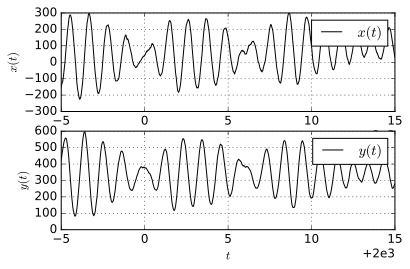

In [5]:
plt.figure()
plt.style.use("classic")
plt.subplot(2,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, x_coord, color="black", label="$x(t)$")
plt.legend()

plt.subplot(2,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, y_coord, color="black", label="$y(t)$")
plt.legend()
plt.savefig("./figures/x_and_y.eps", format="eps")
plt.show()

##### Выгружем данные для удаления тренда и гармоник с $h < 7 $ лет

In [6]:
with open("trend_x.txt", 'w') as datatxt:
    for i in range(len(x_coord)) :
        print(date[i], '\t', x_coord[i], file=datatxt)
with open("trend_y.txt", 'w') as datatxt:
    for i in range(len(y_coord)) :
        print(date[i], '\t', y_coord[i], file=datatxt)

In [7]:
H = 0.00039

##### Загружем отфильрованные данные

In [8]:
with open("detrend_x.txt", 'r') as data_x_txt:
    data = data_x_txt.read()
    data = data.split()
    detrend_x = np.array(data[1::2]).astype(np.float32)
    detrend_date = np.array(data[0::2]).astype(np.float32)
    print(detrend_x.shape, detrend_date.shape)

with open("detrend_y.txt", 'r') as data_x_txt:
    data = data_x_txt.read()
    data = data.split()
    detrend_y = np.array(data[1::2]).astype(np.float32)
    print(detrend_y.shape)

with open("det_del_har_x.txt", 'r') as data_x_txt:
    data = data_x_txt.read()
    data = data.split()
    filtred_x = np.array(data[1::2]).astype(np.float32)
    filtred_date = np.array(data[0::2]).astype(np.float32)
    print(filtred_x.shape, filtred_date.shape)
with open("det_del_har_y.txt", 'r') as data_y_txt:
    data = data_y_txt.read()
    data = data.split()
    filtred_y = np.array(data[1::2]).astype(np.float32)
    print(filtred_y.shape)

(7305,) (7305,)
(7305,)
(7305,) (7305,)
(7305,)


In [9]:
print("d_d: {}".format(detrend_date))
print("d_x: {}".format(detrend_x))
print("d_y: {}".format(detrend_y))
print("f_d: {}".format(filtred_date))
print("f_x: {}".format(filtred_x))
print("f_y: {}".format(filtred_y))

d_d: [1995.0021 1995.0048 1995.0074 ... 2014.9938 2014.9966 2014.9993]
d_x: [-213.8424   -211.3164   -209.1304   ...  -29.153402  -30.498404
  -32.0264  ]
d_y: [ 78.49239   81.281395  83.988396 ... -63.16361  -62.33661  -61.945606]
f_d: [1995.0021 1995.0048 1995.0074 ... 2014.9938 2014.9966 2014.9993]
f_x: [-224.42366  -221.85432  -219.62498  ...  -39.864628  -41.166317
  -42.650993]
f_y: [ 71.935165  74.73031   77.443474 ... -69.73913  -68.90605  -68.50896 ]


##### Построим отфильтованные данные

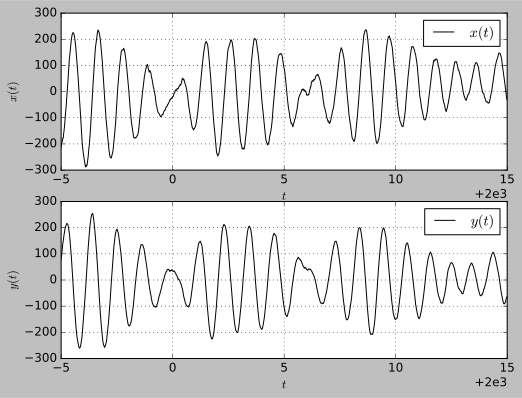

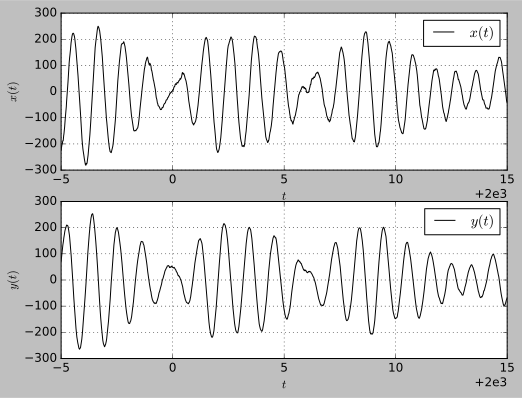

In [10]:
plt.figure()
plt.style.use("classic")
plt.subplot(2,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(detrend_date, detrend_x, color="black", label="$x(t)$")
plt.legend()

plt.subplot(2,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(detrend_date, detrend_y, color="black", label="$y(t)$")
plt.legend()
plt.savefig("./figures/x_and_y_filtred.eps", format="eps")
plt.show()

plt.figure()
plt.style.use("classic")
plt.subplot(2,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, filtred_x, color="black", label="$x(t)$")
plt.legend()

plt.subplot(2,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, filtred_y, color="black", label="$y(t)$")
plt.legend()
plt.savefig("./figures/x_and_y_filtred.eps", format="eps")
plt.show()

# 2 Переходим к полярному углу

In [11]:
def polar_coordinate_system(x: "np.array", y: "np.array"):
    r = np.sqrt(x ** 2 + y ** 2)
#     phi = [np.arctan(y[0] / x[0]) + np.pi]
    phi = [0]
    for i in range(len(r) - 1):
        delta_x = x[i + 1] - x[i]
        delta_y = y[i + 1] - y[i]
        delta_r = np.sqrt(delta_x ** 2 + delta_y ** 2)
        delta_phi = np.arccos(np.minimum(1,(r[i + 1] ** 2 + r[i] ** 2 - delta_r ** 2)/
                              (2 * r[i + 1] * r[i])))
        k = (x[i] * (y[i] - y[i - 1]) - y[i] * (x[i] - x[i - 1]))
        k /= np.abs(k)
        phi.append(phi[i] + delta_phi * k)

    return r, phi

In [12]:
# найдем пол-е коор-ы для наших обработанных данных
r, phi = polar_coordinate_system(filtred_x, filtred_y)

In [13]:
print(np.shape(r), np.shape(phi), np.shape(filtred_date))

(7305,) (7305,) (7305,)


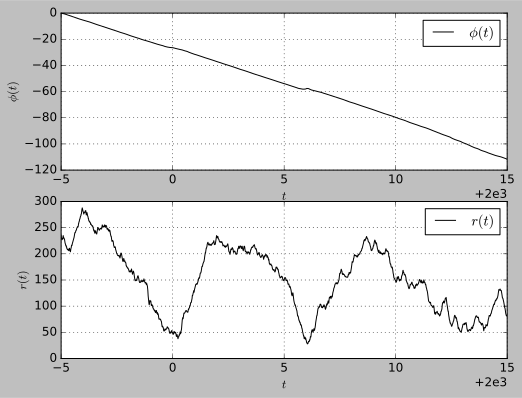

In [14]:
plt.figure()
plt.style.use("classic")
plt.subplot(2,1,1)
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, phi, color="black", label="$\phi(t)$")
plt.legend()

plt.subplot(2,1,2)
plt.grid(True)
plt.ylabel("$r(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, r, color="black", label="$r(t)$")
plt.legend()
plt.savefig("./figures/polar.eps", format="eps")
plt.show()

##### Найдем тренд с помощью МНК
$\phi(t)'= at + b$

In [15]:
A = np.vstack([filtred_date, np.ones(len(date))]).T
a, b = np.linalg.lstsq(A, phi, rcond=None)[0]
print("a = {}, b = {}".format(a, b))
trend = a * filtred_date + b

a = -5.453147421239634, b = 10879.773365424093


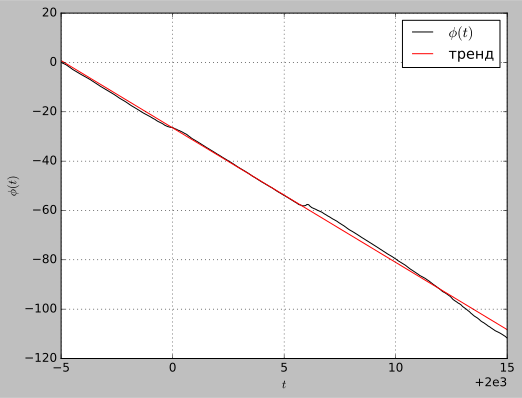

In [16]:
plt.figure()
plt.style.use("classic")
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, phi, color="black", label="$\phi(t)$")
plt.plot(filtred_date, trend, color="red", label="тренд")
plt.legend()
plt.show()

Вычитаем из $\phi$ наш тренд

In [17]:
detrend_phi = phi - trend

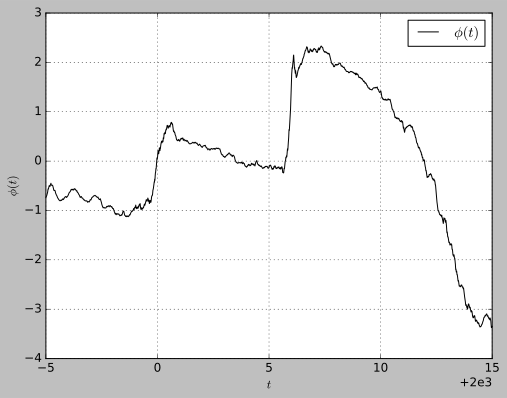

In [18]:
plt.figure()
plt.style.use("classic")
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, detrend_phi, color="black", label="$\phi(t)$")
plt.legend()
plt.show()

##### Удалим тренд с помощью автосигнала

In [19]:
with open("trend_phi.txt", 'w') as datatxt:
    for i in range(len(phi)) :
        print(filtred_date[i], '\t', phi[i], file=datatxt)

In [20]:
with open("detrend_phi.txt", 'r') as data_txt:
    data = data_txt.read()
    data = data.split()
    detrend_phi_a = np.array(data[1::2]).astype(np.float32)
    detrend_date_a = np.array(data[0::2]).astype(np.float32)
    print(detrend_x.shape, detrend_date.shape)

(7305,) (7305,)


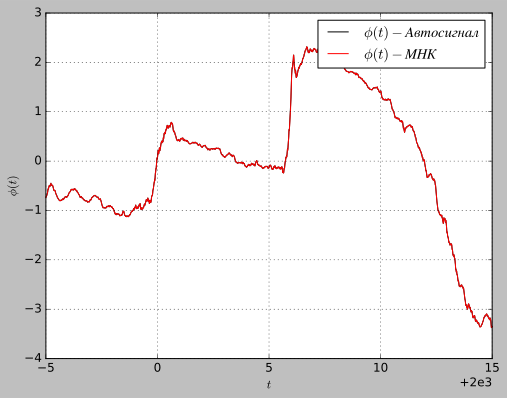

In [21]:
plt.figure()
plt.style.use("classic")
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(detrend_date_a, detrend_phi_a, color="black", label="$\phi(t) - Автосигнал$")
plt.plot(filtred_date, detrend_phi, color="red", label="$\phi(t) - МНК$")
plt.legend()
plt.show()

# 3

In [22]:
1/7

0.14285714285714285